## Task 1

## Prediction Using Supervised Machine Learning 

### Name : Gajanan Karande

### Objective
* Predict the Percentage of an Student based on no. of studying hours this a simple linear regression task

In [1]:
################################## Data Analysis & Calculation ##################################
import pandas as pd  
import numpy as np  

############# Data Visualization ###############
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

#################### Model Building & data partition #####################
import statsmodels.api as sm 
from statsmodels.stats import diagnostic as diag 
from sklearn.model_selection import train_test_split 

# Data Import

In [2]:
new= pd.read_csv(r"C:\Users\gajan\Downloads\student_scores - student_scores.csv")

#looking at 1st five rows
new.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Looking at the last five rows
new.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Data Type

In [4]:
# What type of values are stored in the columns?
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Univariate Analysis

In [5]:
# Let's look at some statistical information about
#our dataframe.
new.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Identify & Treatment of Outlier 

<AxesSubplot:ylabel='Hours'>

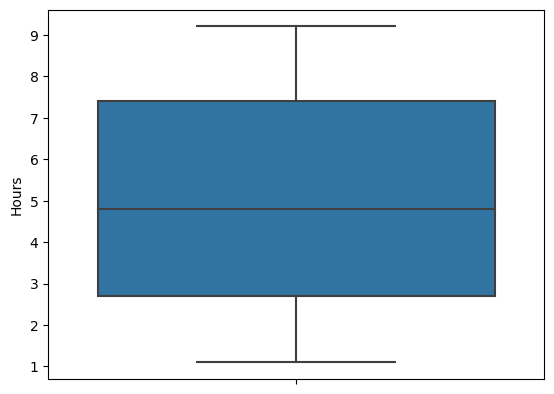

In [6]:
sns.boxplot(y='Hours',data=new)

<AxesSubplot:ylabel='Scores'>

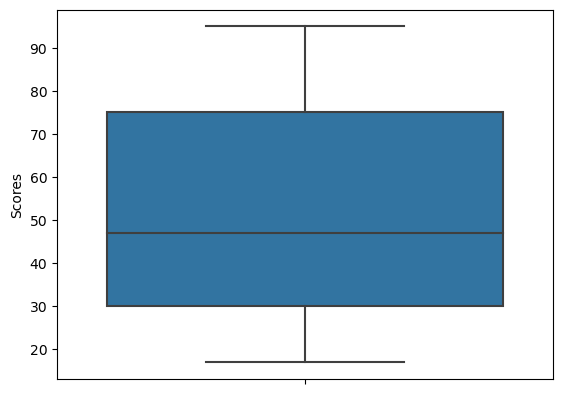

In [7]:
sns.boxplot(y='Scores',data=new)

### Missing Value

In [9]:
# Do we have NA's in data
new.isna().sum()

Hours     0
Scores    0
dtype: int64

# Data Partition 

In [10]:
new.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
x=new[['Hours']]
y=new[['Scores']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [12]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


# Correlation 

#### Scatter Plot ( Bi-variate Analysis)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

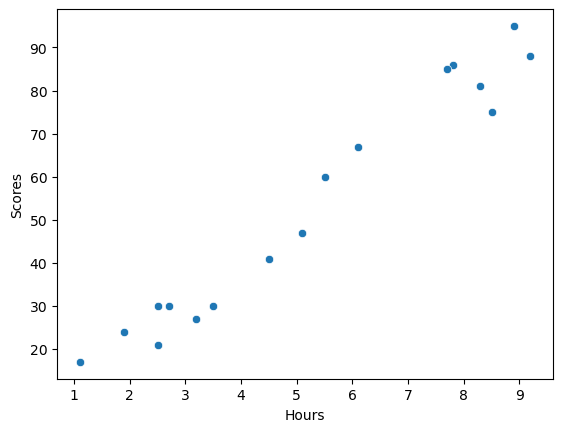

In [13]:
sns.scatterplot(x='Hours', y='Scores',data=train)

#### Correlation Matrix

In [14]:
train.corr()

,Hours,Scores
Hours,1.000000,0.978301
Scores,0.978301,1.000000


<AxesSubplot:>

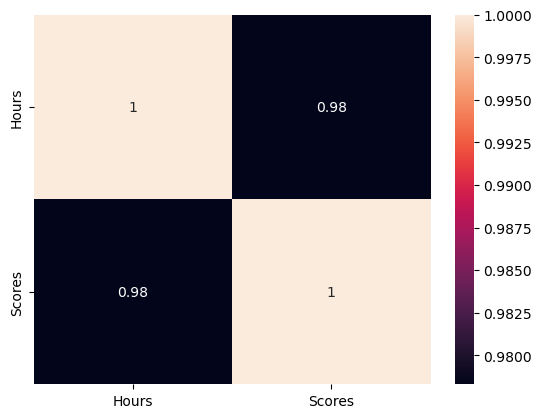

In [15]:
sns.heatmap(train.corr(),annot = True)

* 98% strong Positive correlation between Scores & Hours

# Model Building

### Hypotheis Testing

* H0 : - There is no relationship between the Scores & Hours
                    Vs
* H1 : -There is  relationship between the Scores & Hours

Alpha =5% ( 0.05 )

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('Scores ~ Hours', data=train).fit()
model.summary()

C:\Users\gajan\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.15e-11
Time:                        20:19:46   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4951      3.169      0.472      0.644      -5.260       8.250
Hours          9.8717      0.540     18.288      0.000       8.721      11.022
==============================================================================
Omnibus:                        4.576   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.488
Skew:                          -0.198   Prob(JB):                        0.475
Kurtosis:                       1.606   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion 

* We Reject Ho
* There is  relationship between the Scores & Hours
* Accuracy of Model is 95%, So Model is Good Fit 
* Y = 1.4951 + 9.8717 * Hours

# Assumption of Model

* Linearity
* Homoscedasicity -- ( Constant Variance )
* Normality
* Model Error has to be independently identificaly Distibuted

# Linearity

<AxesSubplot:xlabel='Scores', ylabel='Hours'>

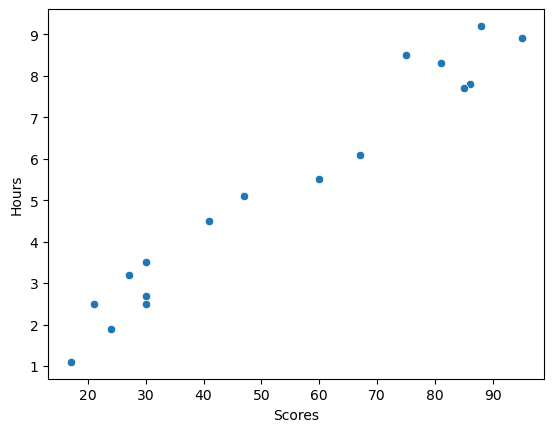

In [20]:
sns.scatterplot(x='Scores', y='Hours',data=train)

In [21]:
train.head()

,Hours,Scores
6,9.2,88
12,4.5,41
4,3.5,30
24,7.8,86
0,2.5,21


In [24]:
# y = Beta0 + Beta 1 * YearExperience
y= 1.4951 + 9.8717 * 4.5
y

45.917750000000005

In [25]:
train['fitted_value']=model.fittedvalues # prediction  or fitted value
train['residual']=model.resid  # error or residual

train.head()

,Hours,Scores,fitted_value,residual
6,9.2,88,92.314915,-4.314915
12,4.5,41,45.917857,-4.917857
4,3.5,30,36.046143,-6.046143
24,7.8,86,78.494515,7.505485
0,2.5,21,26.174428,-5.174428


# Homoscedasicity ( Constant Variance )

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

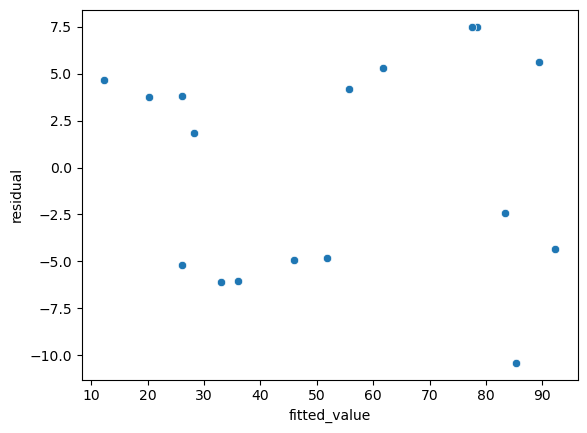

In [26]:
sns.scatterplot(x='fitted_value', y='residual',data=train)

# Normality

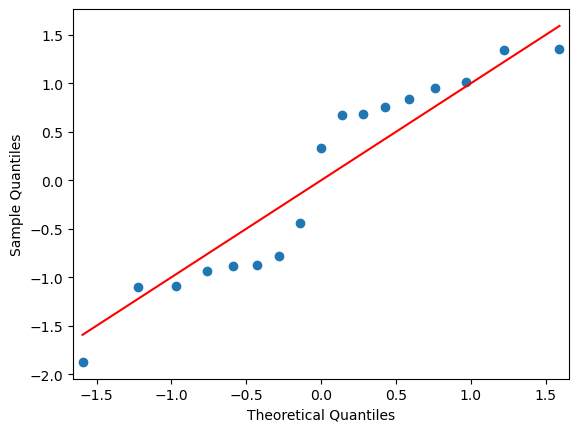

In [27]:
fig = sm.qqplot(train['residual'], fit=True, line='s') 

# s indicate standardized line
plt.show()

# Model Error are IID 

C:\Users\gajan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


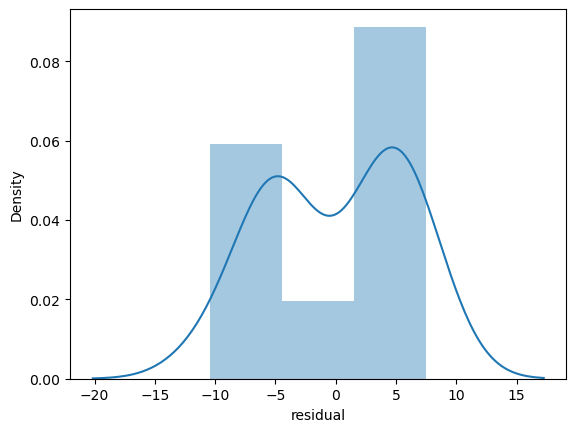

In [28]:
ax = sns.distplot(train.residual) 

# Prediction on Test Data (unseen data)

In [29]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Hours,Scores
9,2.7,25
22,3.8,35
13,3.3,42
11,5.9,62
5,1.5,20


In [30]:
y = 1.4951 + 9.8717 * 9.25 # manual 
y

92.808325

### If the student studies 9.25 hours per day he got score 92.80 this is predict by model.